수산물 공급을 위해서 새로운 생선을 수시로 들여오는데, 문제가 있습니다.

1. 새로운 수산물이 들어올 때, 학습을 하기에는 시간이 늦습니다.
2. 훈련하는 시간도 있고, 데이터도 더 많이 늘어나면 훈련 시간이 늘어납니다.
3. 훈련 데이터가 한 번에 준비되는 것이 아니라, 지속적으로 생선이 추가될 때마다 점진적으로 늘어난다는 점입니다.
4. 데이터를 줄이려면, 기존의 데이터를 지워야 하는데, 중요한 데이터를 지울 수 있습니다. 당연히 예측에 영향이 있을테니 이것은 피하고 싶습니다.

문제를 해결하려면 어떻게 해야 할까요? 

기존 데이터를 버리지 않고, 새로운 데이터에 대해서만 조금씩 훈련할 수 없을까요?

점진적 학습, 즉 온라인 학습을 통하여 이런 문제를 해결할 수 있을지도 모릅니다. 

그래서 저는 오늘 확률적 경사 하강법(Stochastic Gradient Descent)을 배워볼까 합니다.

확률적 경사 하강법은 

1. 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 내려갑니다.
2. 다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려갑니다.
3. 모든 훈련 세트를 모두 사용하여 경사를 내려옵니다.
4. 만일 산을 다 내려오지 않았다면 다시 1부터 3까지의 훈련을 다시 합니다.

에포크(epoch) : 훈련 세트를 1회 모두 사용하는 과정( 1~ 3번 훈련을 1회 완료)

확률적 경사 하강법에서 발전한 미니배치 경사 하강법를 실전에서 많이 사용합니다.

미니배치 경사 하강법(minibatch gradient descent)은 하나의 샘플대신 여러 개의 샘플을 선택하여 경사를 내려갑니다.

손실함수(loss function)는 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준입니다. 즉 답이 틀리는 것을 의미합니다.
1. 값이 작을수록 좋다.
2. 경사 하강법의 손살함수 종류에는 로지스틱 손실 함수(logistic loss function)이 있다. 이 함수는 이진 크로스엔트로피 손실 함수(binary corss-entriopy loss function)라고도 불립니다.
3. 회귀의 손실함수로는 평균 제곱 오차(mean squared error)가 많이 사용됩니다. 타킷에 예측을 뺀 값을 제곱한 다음 모든 샘플에 평균한 값입니다. 작을 수록 좋습니다.

In [ ]:
# 훈련 세트와 테스트 세트를 생성
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

display(fish.head)

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

<bound method NDFrame.head of     Species  Weight  Length  Diagonal   Height   Width
0     Bream   242.0    25.4      30.0  11.5200  4.0200
1     Bream   290.0    26.3      31.2  12.4800  4.3056
2     Bream   340.0    26.5      31.1  12.3778  4.6961
3     Bream   363.0    29.0      33.5  12.7300  4.4555
4     Bream   430.0    29.0      34.0  12.4440  5.1340
..      ...     ...     ...       ...      ...     ...
154   Smelt    12.2    12.2      13.4   2.0904  1.3936
155   Smelt    13.4    12.4      13.5   2.4300  1.2690
156   Smelt    12.2    13.0      13.8   2.2770  1.2558
157   Smelt    19.7    14.3      15.2   2.8728  2.0672
158   Smelt    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 6 columns]>

In [ ]:
# 데이터 정규화
# 모든 데이터 포인트가 동일한 정도의 스케일(중요도)로 반영되도록 해주는 게 정규화(Normalization)의 목표
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

train_scaled.shape

(119, 5)

In [ ]:
# 확률적 경사 하강법(Stochastic Gradient Descent)
from sklearn.linear_model import SGDClassifier

# max_iter 횟수가 모자르다는 Warning이 나오지만 일단 무시한다.그냥 실습이니까.좀 적어도 된다.
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
# 점진적으로 계속 훈련하려면 partial_fit를 사용한다.
# 위에서 1번 다 학습했으므로, partial_fit가 끝난 후에는 epoch는 2인 상태이다.
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


조기 종료(early stopping) : 과대 적합이 시작하기 전에 훈련을 멈추는 것

조기 종료를 하기 위해서 partial_fit로 데이터 세트를 변경해보면서 확인해본다.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


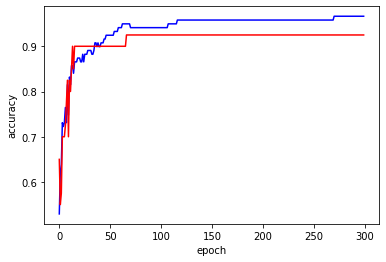

In [ ]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

print(classes)

# 300번 epoch하면서 score를 확인한다.
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

# 그래프로 그려본다.
import matplotlib.pyplot as plt
plt.plot(train_score, color='blue')
plt.plot(test_score, color='red')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 결과 : 100번 epoch 정도가 가장 훈련 세트와 테스트 세트의 스코어가 격차가 적어보인다.
# 25번은 너무 적다.

In [ ]:
# 다시 SGDClassifier의 100에 맞추고 모델을 다시 훈련 (max_iter = 100)
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
# 돌발 실습 : 현재 손실 변수를 log로 선택했으나 이것을 hinge로 변경하면 어떤 일이 벌어질까?
# 다시 SGDClassifier의 100에 맞추고 모델을 다시 훈련 (max_iter = 100)
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 결과 : 조금 score가 낮아진다. 0.957 -> 0.949

0.9495798319327731
0.925


정리 : 확률적 경사 하강법을 사용하여, 점진적으로 학습하는 방법을 배웠다.
특이사항 : sklearn의 SGCClassifier는 학습을 하다가 지정한 epoch 동안 손실값이 좋아지지 않으면 알고리즘이 중단됩니다. 